In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

import re
import string

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install emoji

     |████████████████████████████████| 133kB 8.4MB/s 


In [ ]:
import emoji

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/val.csv', sep=',')

In [ ]:
df

,title,description,subcategory,category,price,region,city,datetime_submitted,is_bad
0,Шины,Звонить 89425546881,Запчасти и аксессуары,Транспорт,2000.0,Тульская область,Огаревка,2019-10-10 00:00:25.200714,1
1,Продается мобильная перегородка с дверью,"Мобильная перегородка, предназначена для разгр...",Оборудование для бизнеса,Для бизнеса,10500.0,Вологодская область,Вологда,2019-10-10 00:03:11.527292,0
2,Комплект зимних шин на дисках 682/32/64,Шины зимние б/у Marshal Assimetric I”Zen KW 61...,Запчасти и аксессуары,Транспорт,4000.0,Россия,Москва,2019-10-10 00:05:07.193248,1
3,Кровать-трансормер Дакота сб-4085,"Продаю кровать-трансформер производства ""Столп...",Мебель и интерьер,Для дома и дачи,17000.0,Московская область,Химки,2019-10-10 00:05:58.165179,0
4,Honda VFR 800 2004 г.в,"Мот в отличном состоянии для своих лет, Родной...",Мотоциклы и мототехника,Транспорт,235000.0,Брянская область,Брянск,2019-10-10 00:06:19.231151,0
...,...,...,...,...,...,...,...,...,...
16232,Офисное помещение,Сдаются офисное помещение по Ул Калинина 80. П...,Коммерческая недвижимость,Недвижимость,9200.0,Чувашия,Чебоксары,2019-10-14 23:57:30.094904,0
16233,iPhone 8 Plus Silver 25GB,Оригинальный ростест айфон. Идеальное состояни...,Телефоны,Бытовая электроника,20000.0,Татарстан,Казань,2019-10-14 23:57:50.610616,0
16234,"6-к квартира, 54 м², 5/9 эт.",______________________________________________...,Квартиры,Недвижимость,3300000.0,Ставропольский край,Пятигорск,2019-10-14 23:58:02.781579,0
16235,"4-к квартира, 60 м², 9/9 эт.",/\n /\n● Работаем БЕЗ ПЕРЕРЫВОВ И ВЫХОДНЫХ с ...,Квартиры,Недвижимость,2300000.0,Ставропольский край,Пятигорск,2019-10-14 23:59:01.435691,0


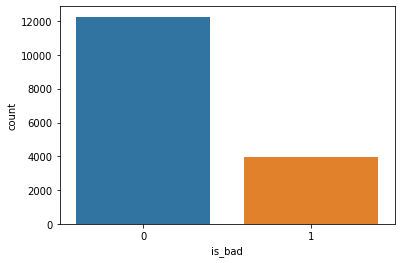

In [ ]:
sns.countplot(x='is_bad', data=df)

In [ ]:
data = df[['description', 'is_bad']]

In [ ]:
# for i, j in enumerate(data['is_bad']):
#   if j == 1:
#     print(data['description'][i])
#     print('//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

In [ ]:
def cleanr(text):
    text = re.sub(emoji.get_emoji_regexp(), r"", text)
    text = re.sub(r'[^А-Яа-я\s\w]', '', text)
    text = re.sub(r'\+7\d{10}', ' звонить телефон тел ', text) 
    text = re.sub(r'8\d{10}', ' звонить телефон тел ', text) 
    text = re.sub(r'8[\d\s\W]{13}', ' звонить телефон тел ', text)
    text = re.sub(r'9[\d\s\W]{13}', ' звонить телефон тел ', text) 
    text = re.sub(r'9[\W\w]{13}', ' звонить телефон тел ', text)
    text = re.sub(r'7[\W\w]{13}', ' звонить телефон тел ', text)
    text = re.sub(r'8[\W\w]{13}', ' звонить телефон тел ', text)
    return text

In [ ]:
data_train = data['description'].apply(cleanr)

In [ ]:
# for i in data_train:
#   print(i)

In [ ]:
def cleanTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','',txt)
    txt = re.sub(r'#','',txt)
    txt = re.sub(r'RT : ','',txt)
    txt = re.sub(r'\n','',txt)
    # to remove emojis
    txt = re.sub(emoji.get_emoji_regexp(), r"", txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',txt)
    txt = re.sub(r"https?://\S+|www\.\S+","",txt)
    txt = re.sub(r"<.*?>","",txt)
    return txt 

In [ ]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

def make_Lower(text):
    return str.lower(text)

In [ ]:
d_1 = data_train.apply(remove_punct)


In [ ]:
d_2 = data_train.apply(make_Lower)

In [ ]:
d_2

0                            звонить  звонить телефон тел 
1        мобильная перегородка предназначена для разгра...
2        шины зимние бу marshal assimetric izen kw 61 6...
3        продаю кроватьтрансформер производства столпли...
4        мот в отличном состоянии для своих лет родной ...
                               ...                        
16232    сдаются офисное помещение по ул калинина  звон...
16233    оригинальный ростест айфон идеальное состояние...
16234    ______________________________________________...
16235     \n \n работаем без перерывов и выходных с  зв...
16236    машина технически в отличном состояние все сис...
Name: description, Length: 16237, dtype: object

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = set(stopwords.words('russian'))


In [ ]:
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

In [ ]:
d_3 = d_2.apply(remove_stopwords)

In [ ]:
d_3

0                              звонить звонить телефон тел
1        мобильная перегородка предназначена разграниче...
2        шины зимние бу marshal assimetric izen kw 61 6...
3        продаю кроватьтрансформер производства столпли...
4        мот отличном состоянии своих лет родной пласти...
                               ...                        
16232    сдаются офисное помещение ул калинина звонить ...
16233    оригинальный ростест айфон идеальное состояние...
16234    ______________________________________________...
16235    работаем перерывов выходных звонить телефон те...
16236    машина технически отличном состояние системы р...
Name: description, Length: 16237, dtype: object

In [ ]:
vocab = 20000
oov = '<OOV>'
embedding = 32
padding = 'post'
truncate = 'post'

In [ ]:
# import necessary libraries for text preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
train_ = d_3
train_y = df['is_bad']

In [ ]:
er = pd.DataFrame(d_3)


In [ ]:
# for i in er['description']:
#   print(i)
#   print('--------------------------------------------------------------------')


In [ ]:
er.shape

(16237, 1)

In [ ]:
train_ = er
train_y = pd.DataFrame(df['is_bad'])

In [ ]:
train_size = 0.8
size = int(train_size * train_.shape[0])
train_x_data = train_.iloc[:size,:]
train_y_data =  train_y.iloc[:size]
print("Shape of X train data: ",train_x_data.shape)
print("Shape of Y train data",train_y_data.shape)https://hh.ru/resume/77317e2fff04d73d630039ed1f5753644f6e49

validation_x_data = train_.iloc[size:,:]
validation_y_data =  train_y.iloc[size:]
print("Shape of X validation data: ",validation_x_data.shape)
print("Shape of Y validation data",validation_y_data.shape)

Shape of X train data:  (12989, 1)
Shape of Y train data (12989, 1)
Shape of X validation data:  (3248, 1)
Shape of Y validation data (3248, 1)


In [ ]:
tokenizer = Tokenizer(num_words = vocab, oov_token = oov)
tokenizer.fit_on_texts(train_x_data['description'])
word_index = tokenizer.word_index
print("Length: ",len(word_index))


Length:  113351


In [ ]:
training_x = tokenizer.texts_to_sequences(train_x_data['description'])
training_x_pad = pad_sequences(training_x,maxlen=25, padding=padding, truncating=truncate)

validation_x = tokenizer.texts_to_sequences(validation_x_data['description'])
validation_x_pad = pad_sequences(validation_x,maxlen=25, padding=padding, truncating=truncate)

training_y = train_y_data.values
validation_y = validation_y_data.values
print()

In [ ]:
import tensorflow as tf
import keras
from keras import layers 

def give_model():
    model = keras.models.Sequential()
    model.add(layers.Embedding(vocab, embedding, input_length=25))
    model.add(layers.Bidirectional(layers.LSTM(128,return_sequences = True)))
    model.add(layers.LSTM(64))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(units = 10,activation = 'relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(units = 1, activation = 'sigmoid'))
    
    
    return model
model = give_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            640000    
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 256)           164864    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 2, mode = 'min', min_delta = 0.01)
LOSS = tf.keras.losses.BinaryCrossentropy()
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate = 0.0001)
VALIDATION_DATA = (validation_x_pad,validation_y)
model.compile(loss = LOSS, optimizer = OPTIMIZER, metrics = [tf.keras.metrics.AUC()])

In [ ]:
history = model.fit(training_x_pad, training_y, epochs = 30, validation_data = VALIDATION_DATA)

Epoch 1/30
406/406 [==============================] - 13s 20ms/step - loss: 0.0233 - auc_2: 0.9992 - val_loss: 2.1343 - val_auc_2: 0.9732
Epoch 2/30
406/406 [==============================] - 6s 16ms/step - loss: 0.0289 - auc_2: 0.9561 - val_loss: 1.9611 - val_auc_2: 0.9609
Epoch 3/30
406/406 [==============================] - 6s 16ms/step - loss: 0.0218 - auc_2: 0.9545 - val_loss: 1.8943 - val_auc_2: 0.9576
Epoch 4/30
406/406 [==============================] - 6s 16ms/step - loss: 0.0189 - auc_2: 0.9537 - val_loss: 2.0120 - val_auc_2: 0.9564
Epoch 5/30
406/406 [==============================] - 6s 16ms/step - loss: 0.0194 - auc_2: 0.9536 - val_loss: 2.2548 - val_auc_2: 0.9554
Epoch 6/30
406/406 [==============================] - 6s 16ms/step - loss: 0.0222 - auc_2: 0.9527 - val_loss: 2.0674 - val_auc_2: 0.9546
Epoch 7/30
406/406 [==============================] - 6s 16ms/step - loss: 0.0188 - auc_2: 0.9527 - val_loss: 2.3743 - val_auc_2: 0.9541
Epoch 8/30
406/406 [====================

In [ ]:
score = model.evaluate(validation_x_pad, validation_y,
                        verbose=1)
print()
print(u'Оценка теста: {}'.format(score[0]))
print(u'Оценка точности модели: {}'.format(score[1]))

102/102 [==============================] - 1s 5ms/step - loss: 2.9287 - auc_2: 0.9482

Оценка теста: 2.9286949634552
Оценка точности модели: 0.948173999786377


In [ ]:
#s = model.predict(validation_x_pad)

prediction = model.predict(validation_x_pad)
predicted_value = (prediction > 0.5).astype(int)
predicted_value

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])